In [1]:
import numpy as np

In [113]:
rozenbrok = lambda x, y: (1-x)**2 +100 * (y - x**2)**2
parab = lambda x: x**2 + y**2
derX = lambda f, x, y, dx: (f(x+dx, y)-f(x, y))/dx
derY = lambda f, x, y, dy: (f(x, y+dy)-f(x, y))/dy

def charges(x, y):
    x_1, x_2, y_0 = 4, 6, 5
    d = x_2 - x_1
    r_1 = np.sqrt((x - x_1)**2 + (y - y_0)**2)
    r_2 = np.sqrt((x - x_2)**2 + (y - y_0)**2)
    a = (d**2 - r_1**2 - r_2**2)/(2*r_1*r_2+0.1)
    E_1 = 1/(r_1**2+0.1)
    E_2 = 1/(r_2**2+0.1)
    E = 10*np.sqrt(E_1**2 + E_2**2 + 2*E_1*E_2*np.cos(a))
    return -E
def opt(gamma, n_steps=1000):
    x = 2
    y = 4
    step_size = 1
    mass = [[x, y]]
    prev_diff = np.array([derX(rozenbrok, x, y, 1e-8), derY(rozenbrok, x, y, 1e-8)])
    G = prev_diff**2
    for i in range(n_steps):
        diff = np.array([derX(rozenbrok, x, y, 1e-8), derY(rozenbrok, x, y, 1e-8)])
        step = gamma*step_size*diff + (1-gamma)*step_size*prev_diff
        prev_diff = diff
        G += step**2
        step = step/(G+1e-8)**0.5
        x -= step[0]
        y -= step[1]
        mass.append([x, y])
    mass = np.array(mass)
    rozenbrok(x, y), x, y
    return mass

[1.00883527 1.01777335]
[1.05448721 1.11208715]


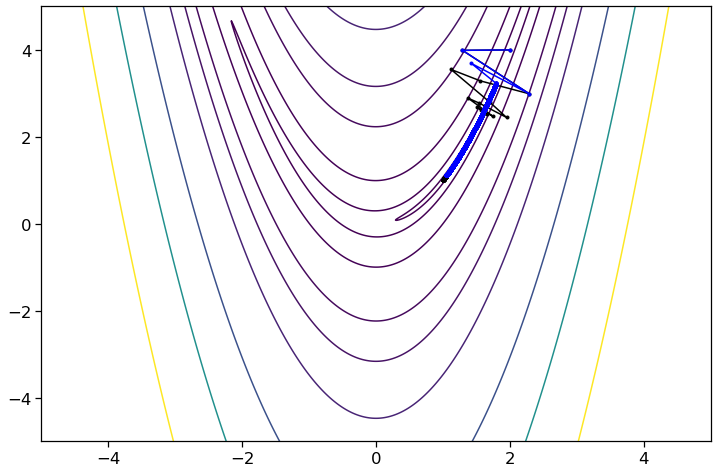

In [122]:
x, y = np.mgrid[-5:5:1000j,
                -5:5:1000j]
z = rozenbrok(x, y)
fig, ax = plt.subplots(figsize=(12, 8))
# lev = [-102, -50, -40, -30, -20, -10, -1]
lev = [5e-1, 1e1, 1e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4]
ax.contour(x, y, z, levels=lev)
mass = opt(0.6, n_steps=10000)
ax.plot(mass[:, 0], mass[:, 1], '.-k')
print(mass[-1])

mass = opt(1, n_steps=10000)
ax.plot(mass[:, 0], mass[:, 1], '.-b')
print(mass[-1])

In [116]:
np.log(1)

0.0